In [1]:
#Import Important Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
#Import Census Income Dataset
train = pd.read_csv('/Users/AdMiN/Desktop/Data Science Projects/Cencus Income Data Set/Original/train.csv')
test = pd.read_csv('/Users/AdMiN/Desktop/Data Science Projects/Cencus Income Data Set/Original/test.csv')

In [3]:
#Check data set
train.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


# 1. Exploratory Data Analysis

In [4]:
#Check shape of train set/test set
print('train set:', train.shape)
print('test set:', test.shape)

train set: (199523, 41)
test set: (99762, 41)


It look like train and test set have the same number of columns. Normally they should not equal due to we have to predict the target variables.

In [5]:
#Combine 2 data set together and label them in case when we clean or manipulate
#We will do only one time

train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index = True, sort = False)


In [6]:
#Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299285 entries, 0 to 299284
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               299285 non-null  int64 
 1   class_of_worker                   299285 non-null  object
 2   industry_code                     299285 non-null  int64 
 3   occupation_code                   299285 non-null  int64 
 4   education                         299285 non-null  object
 5   wage_per_hour                     299285 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       299285 non-null  object
 7   marital_status                    299285 non-null  object
 8   major_industry_code               299285 non-null  object
 9   major_occupation_code             299285 non-null  object
 10  race                              299285 non-null  object
 11  hispanic_origin                   298411 non-null  object
 12  se

In [7]:
#Check Target Variable
print(data['income_level'].unique())
print(data['income_level'].value_counts())

[-50000 50000 '-50000' ' 50000+.']
-50000      187141
-50000       93576
50000        12382
 50000+.      6186
Name: income_level, dtype: int64


It shows different value of income_level, so we need to change these to 2 categories less than 50,000 and More than 50,000

In [8]:
#Replace income_level with 0 and 1
income = {'-50000':0, -50000:0 ,50000:1, ' 50000+.':1}
data['income_level'] = data['income_level'].replace(income)

In [9]:
data['income_level'].value_counts()

0    280717
1     18568
Name: income_level, dtype: int64

It shows imbalance data set 

income_level below 50000 is 94% of total target variable

imcome_level above 50000 is 6% of total target variable

In [10]:
#Check Statistic Summary of Data Set
data.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
count,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000
mean,34.538998,15.345818,11.314743,55.105027,431.742176,36.849010,195.851259,1.956172,0.176461,1.516498,23.178375,94.499998,0.062041
std,22.318468,18.053638,14.455980,273.340729,4670.768536,269.789771,1937.847082,2.364857,0.555240,0.850395,24.404016,0.500001,0.241231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


In [11]:
#Create Age Bin Label
data['age_bins']= pd.cut(x=data['age'], bins=[-1,20,40,60,80,100], labels=['0-20','21-40','41-60','61-80','81-100'])

If we define bin range 0,20,40,60,80,100, it will not count 0 into 0-20 so we put -1 from the start point

In [12]:
data['age_bins'].value_counts()

0-20      94724
21-40     91582
41-60     67238
61-80     38734
81-100     7007
Name: age_bins, dtype: int64

# Strip White Space from Data

You will see some category is the same but different in term of space

'Not in univere' not equal '  Not in universe'  

we will use str.strip() to delete white space in all categorical data

In [13]:
#Create for loop to delete white space 
categorical_data = ['class_of_worker','education','enrolled_in_edu_inst_lastwk',
                    'marital_status','major_industry_code','major_occupation_code',
                   'race','hispanic_origin','sex','member_of_labor_union','reason_for_unemployment',
                   'full_parttime_employment_stat','tax_filer_status','region_of_previous_residence',
                   'state_of_previous_residence','d_household_family_stat','d_household_summary',
                   'migration_msa','migration_reg','migration_within_reg','live_1_year_ago','migration_sunbelt',
                   'family_members_under_18','country_father','country_mother','country_self','citizenship',
                   'fill_questionnaire_veteran_admin']
for i in categorical_data:
    data[i] = data[i].str.strip()

# Explore Distribution of Numeric Data

Text(0.5, 1.0, 'Age Distribution')

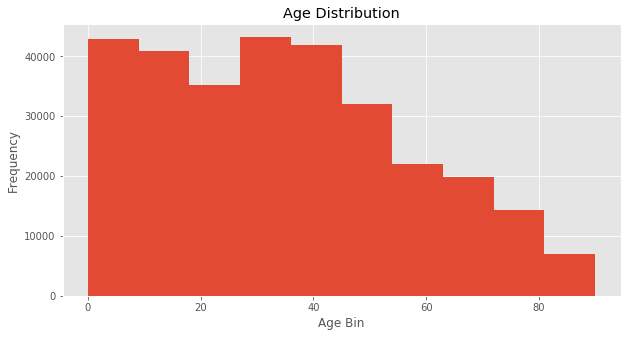

In [14]:
#Age Distribution
data['age'].plot.hist(figsize = (10,5))
plt.xlabel('Age Bin')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Wage Per Hour Distribution')

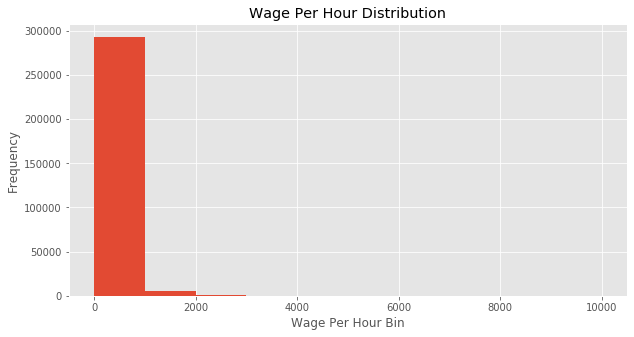

In [15]:
#Wage Per Hour Distribution
data['wage_per_hour'].plot.hist(figsize = (10,5))
plt.xlabel('Wage Per Hour Bin')
plt.title('Wage Per Hour Distribution')

Text(0.5, 1.0, 'Capital Gain Distribution')

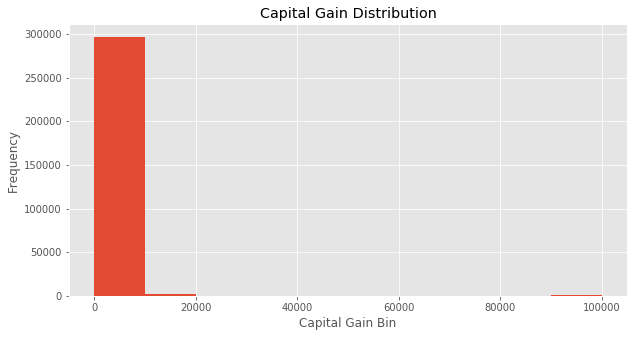

In [16]:
#Capital Gain Distribution
data['capital_gains'].plot.hist(figsize = (10,5))
plt.xlabel('Capital Gain Bin')
plt.title('Capital Gain Distribution')

Text(0.5, 1.0, 'Capital losses Distribution')

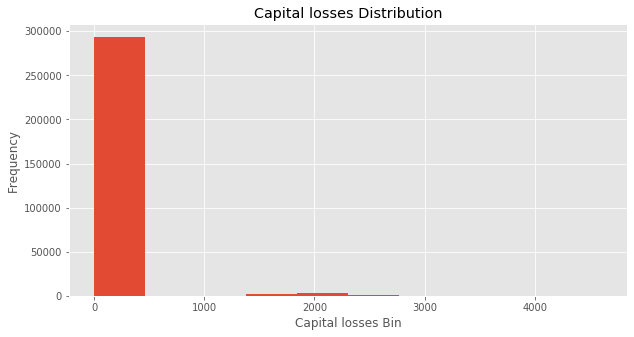

In [17]:
#Capital Losses Distribution
data['capital_losses'].plot.hist(figsize = (10,5))
plt.xlabel('Capital losses Bin')
plt.title('Capital losses Distribution')

Text(0.5, 1.0, 'Dividend from Stock Distribution')

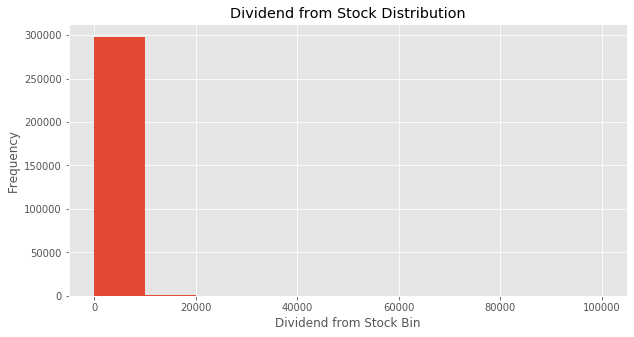

In [18]:
#Dividend from Stocks Distribution
data['dividend_from_Stocks'].plot.hist(figsize = (10,5))
plt.xlabel('Dividend from Stock Bin')
plt.title('Dividend from Stock Distribution')

Text(0.5, 1.0, 'Weeks Worked in Year Distribution')

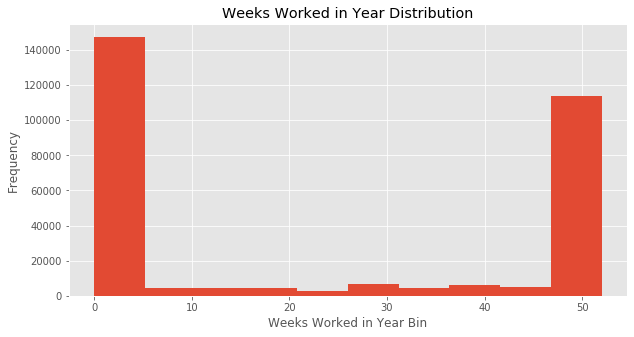

In [19]:
#Weels Worked in Year Distribution
data['weeks_worked_in_year'].plot.hist(figsize = (10,5))
plt.xlabel('Weeks Worked in Year Bin')
plt.title('Weeks Worked in Year Distribution')

# Exploring Binary and Categorical Data

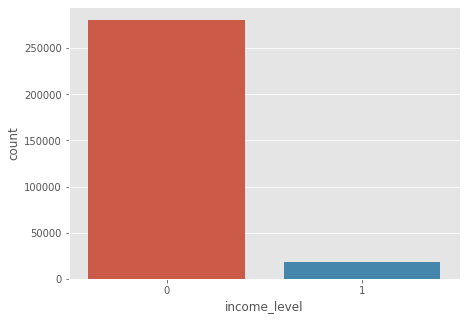

In [18]:
#Exploring income_level
plt.figure(figsize=(7,5))
sns.countplot(x='income_level', data= data, order = data['income_level'].value_counts().index)

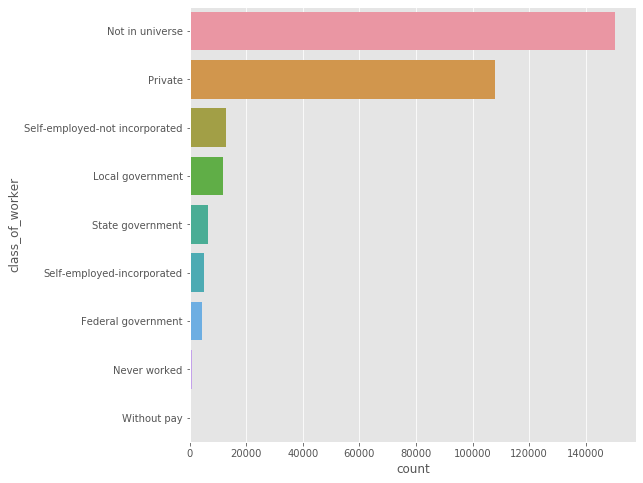

In [21]:
#Exploring class_of_worker
plt.figure(figsize=(8,8))
sns.countplot(y='class_of_worker', data= data, order = data['class_of_worker'].value_counts().index)

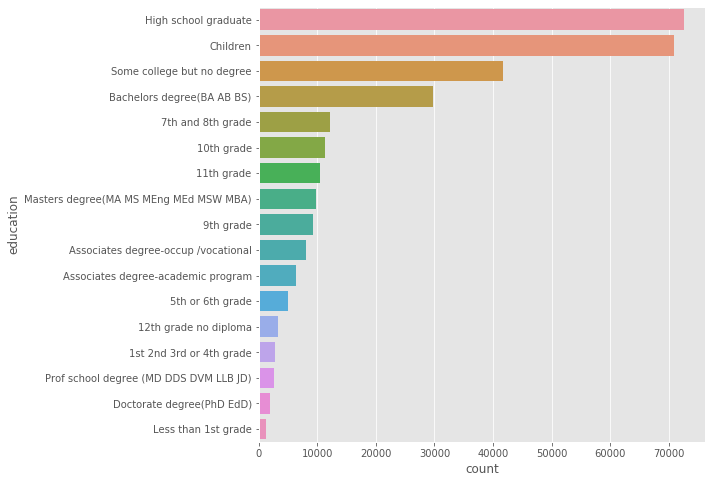

In [22]:
#Exploring education
plt.figure(figsize=(8,8))
sns.countplot(y='education', data= data, order = data['education'].value_counts().index)

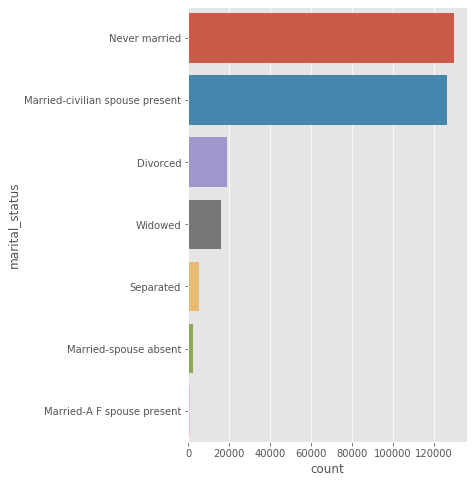

In [23]:
#Exploring marital status
plt.figure(figsize=(5,8))
sns.countplot(y='marital_status', data= data, order = data['marital_status'].value_counts().index)

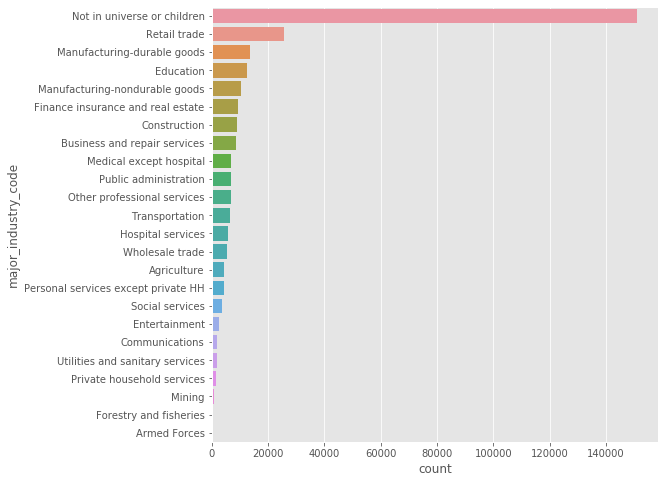

In [24]:
#Exploring major industrial code
plt.figure(figsize=(8,8))
sns.countplot(y='major_industry_code', data= data, order = data['major_industry_code'].value_counts().index)

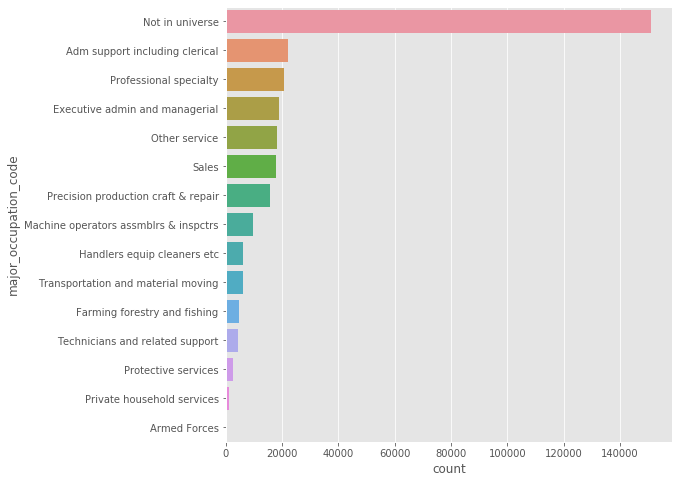

In [25]:
#Exploring major occupation code
plt.figure(figsize=(8,8))
sns.countplot(y='major_occupation_code', data= data, order = data['major_occupation_code'].value_counts().index)

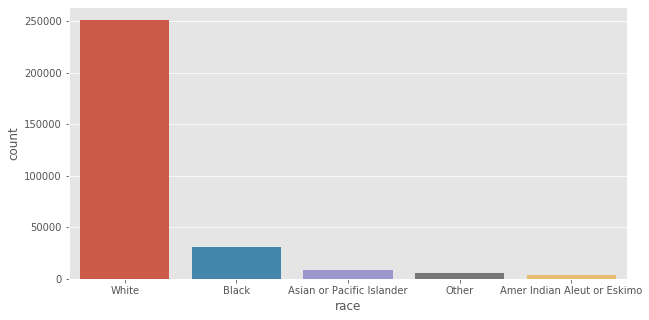

In [26]:
#Exploring race
plt.figure(figsize=(10,5))
sns.countplot(x='race', data= data, order = data['race'].value_counts().index)

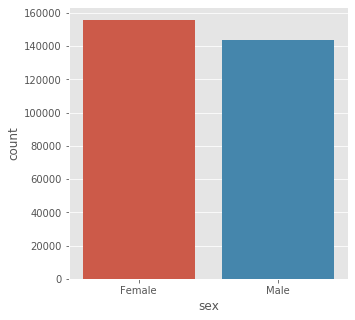

In [28]:
#Exploring sex
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data= data, order = data['sex'].value_counts().index)

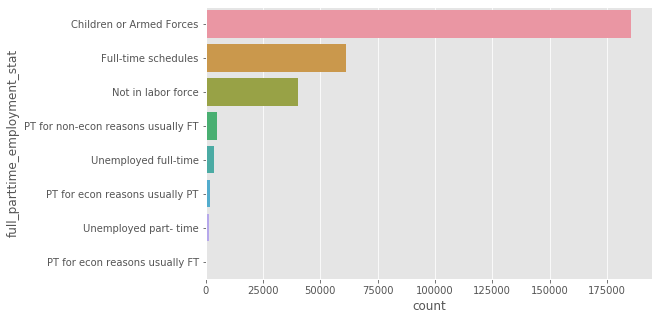

In [29]:
#Exploring full_parttime_employment_stat
plt.figure(figsize=(8,5))
sns.countplot(y='full_parttime_employment_stat', data= data, order = data['full_parttime_employment_stat'].value_counts().index)

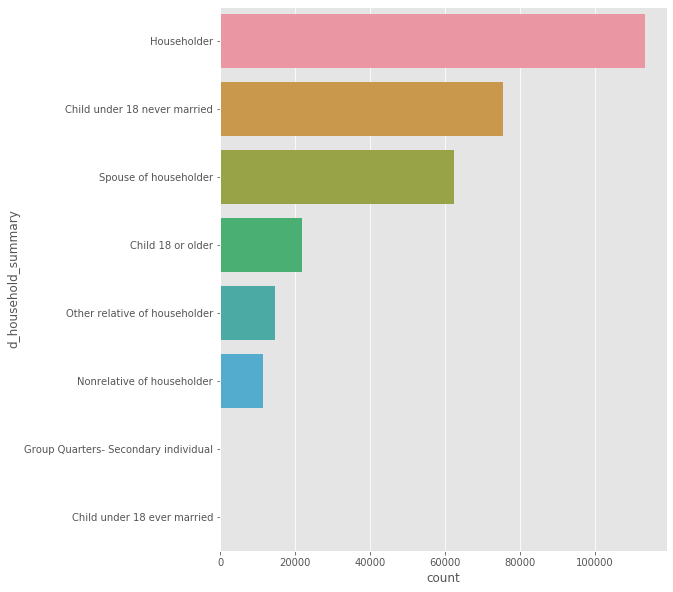

In [30]:
#Exploring full_parttime_employment_stat
plt.figure(figsize=(8,10))
sns.countplot(y='d_household_summary', data= data, order = data['d_household_summary'].value_counts().index)

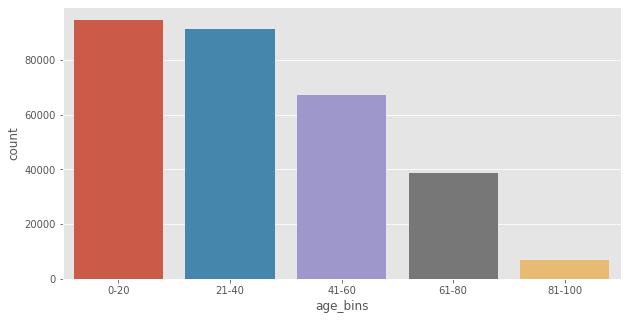

In [31]:
#Exploring Age Range
plt.figure(figsize=(10,5))
sns.countplot(x='age_bins', data= data, order = data['age_bins'].value_counts().index)

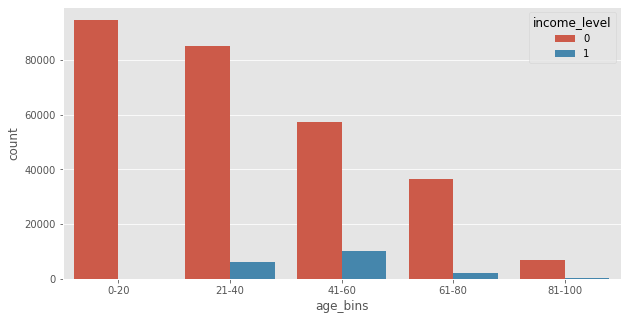

In [32]:
#Exploring Age Range
plt.figure(figsize=(10,5))
sns.countplot(x='age_bins', hue='income_level', data= data, order = data['age_bins'].value_counts().index)

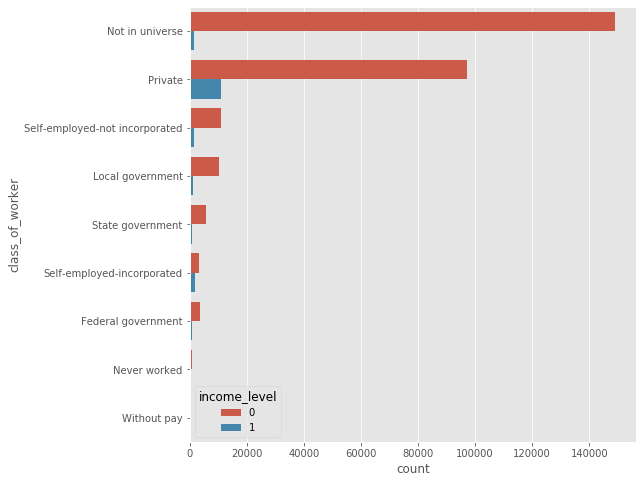

In [33]:
#Exploring class_of_worker with income level
plt.figure(figsize=(8,8))
sns.countplot(y='class_of_worker', hue='income_level', data= data, order = data['class_of_worker'].value_counts().index)

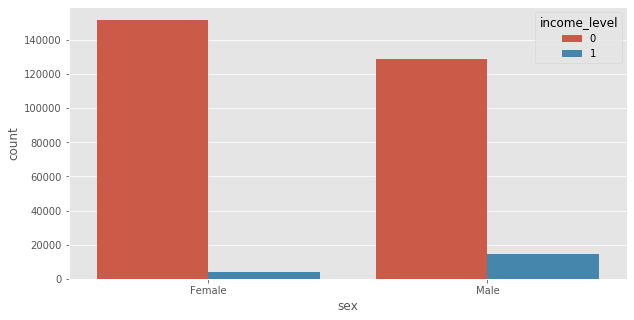

In [34]:
#Exploring sex with income level
plt.figure(figsize=(10,5))
sns.countplot(x='sex', hue='income_level', data= data, order = data['sex'].value_counts().index)

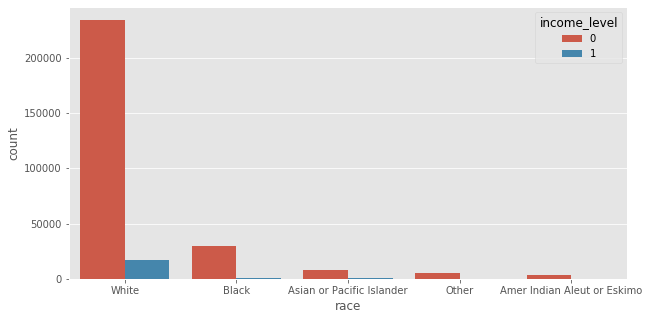

In [35]:
#Exploring race with income
plt.figure(figsize=(10,5))
sns.countplot(x='race', hue='income_level', data= data, order = data['race'].value_counts().index)

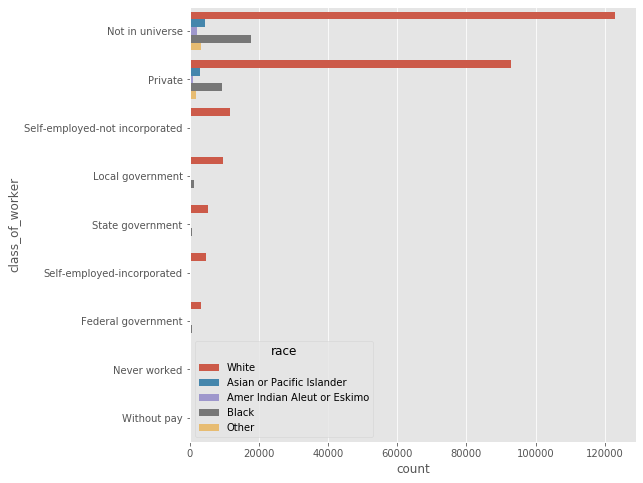

In [36]:
#Exploring class_of_worker with income level
plt.figure(figsize=(8,8))
sns.countplot(y='class_of_worker', hue='race', data= data, order = data['class_of_worker'].value_counts().index)

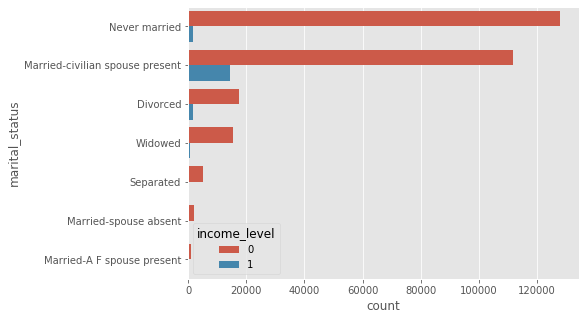

In [37]:
#Exploring marital status
plt.figure(figsize=(7,5))
sns.countplot(y='marital_status', hue='income_level', data= data, order = data['marital_status'].value_counts().index)

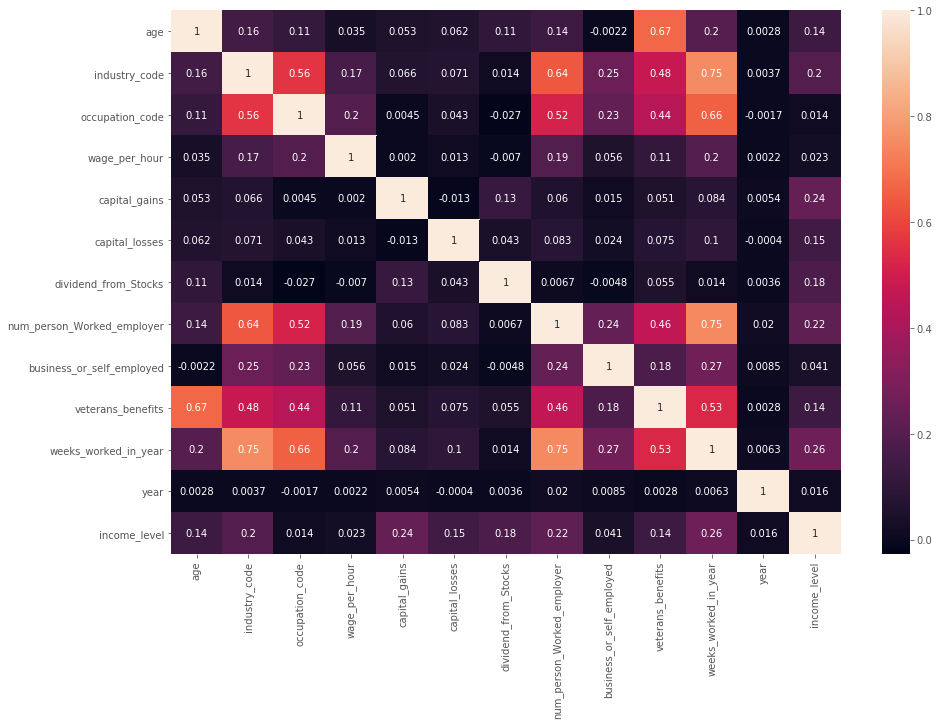

In [38]:
#Correlation Between Numerical Feature
data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot=True)

# 2. Data Preprocessing

In [39]:
#Check %Missing Value
data.isnull().sum()/data.shape[0]*100

age                                  0.000000
class_of_worker                      0.000000
industry_code                        0.000000
occupation_code                      0.000000
education                            0.000000
wage_per_hour                        0.000000
enrolled_in_edu_inst_lastwk          0.000000
marital_status                       0.000000
major_industry_code                  0.000000
major_occupation_code                0.000000
race                                 0.000000
hispanic_origin                      0.292029
sex                                  0.000000
member_of_labor_union                0.000000
reason_for_unemployment              0.000000
full_parttime_employment_stat        0.000000
capital_gains                        0.000000
capital_losses                       0.000000
dividend_from_Stocks                 0.000000
tax_filer_status                     0.000000
region_of_previous_residence         0.000000
state_of_previous_residence       

for columns migraion_msa, migration_reg, migraion_within_reg are not neccesary for predict the income level so we gonna drop all columns and in case others columns that missing value below 5% we can drop na 

In [40]:
#Drop Columns migration
migrate = ['migration_msa','migration_reg','migration_within_reg','migration_sunbelt']
data.drop(migrate,axis=1, inplace=True)

In [43]:
#Remove Missing Value 
data = data.dropna()

#Check Missin Value after drop
data.isnull().sum()

age                                 0
class_of_worker                     0
industry_code                       0
occupation_code                     0
education                           0
wage_per_hour                       0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
capital_gains                       0
capital_losses                      0
dividend_from_Stocks                0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
num_person_Worked_employer          0
family_membe

In [46]:
#Export data to Data Science Project, save as csv file
#Divide data to train set & test set
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

#Drop Unnecessary Column
train.drop('source', axis=1, inplace=True)
test.drop('source', axis=1, inplace=True)

#Export file as modified version
train.to_csv('/Users/AdMiN/Desktop/Data Science Projects/Cencus Income Data Set/Modified/train_modified.csv', index=False)
test.to_csv('/Users/AdMiN/Desktop/Data Science Projects/Cencus Income Data Set/Modified/test_modified.csv', index=False)

D:\Python\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Model Building

we gonna use CatBoost Algorithm to predict income_level due to the advantage of the CatBoost is Encoding built-in

So no need to Feature Engineering to encode categorical data

In [2]:
#Import Library for modelling and evaulation
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
#Import Modified Data Set
train_modified = pd.read_csv('/Users/AdMiN/Desktop/Data Science Projects/Cencus Income Data Set/Modified/train_modified.csv')
test_modified = pd.read_csv('/Users/AdMiN/Desktop/Data Science Projects/Cencus Income Data Set/Modified/test_modified.csv')

train_modified.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level,age_bins
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0,61-80
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0,41-60
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0,0-20
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0,0-20
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0,0-20


In [4]:
#Drop age column out due to we gonna use age_bins instead 
train_modified.drop('age', axis=1, inplace=True)

#Define feature variables and target variable
X = train_modified.drop('income_level', axis=1) #Feature Variables
y = train_modified['income_level'] #Target Variable

In [5]:
#Split data to train & test set, 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [6]:
#Define Categorical Data
categorical_features_indices = np.where(X.dtypes != np.int64)[0]
categorical_features_indices

array([ 0,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22,
       23, 25, 26, 27, 28, 29, 31, 35], dtype=int64)

In [14]:
#Instantiate CatBoost Classifier Model
cat = CatBoostClassifier(iterations=50, learning_rate=0.1, cat_features=categorical_features_indices,class_weights=[1,15] )
cat_cv = cross_val_score(cat, X_train, y_train, scoring='roc_auc', cv=5)

0:	learn: 0.6065262	total: 197ms	remaining: 9.64s
1:	learn: 0.5507921	total: 363ms	remaining: 8.7s
2:	learn: 0.5055505	total: 502ms	remaining: 7.87s
3:	learn: 0.4736002	total: 633ms	remaining: 7.28s
4:	learn: 0.4471797	total: 756ms	remaining: 6.8s
5:	learn: 0.4276787	total: 909ms	remaining: 6.67s
6:	learn: 0.4123786	total: 1.08s	remaining: 6.61s
7:	learn: 0.3947599	total: 1.22s	remaining: 6.42s
8:	learn: 0.3802557	total: 1.32s	remaining: 6.03s
9:	learn: 0.3678815	total: 1.46s	remaining: 5.83s
10:	learn: 0.3590471	total: 1.6s	remaining: 5.68s
11:	learn: 0.3528386	total: 1.73s	remaining: 5.49s
12:	learn: 0.3468037	total: 1.85s	remaining: 5.27s
13:	learn: 0.3418494	total: 1.98s	remaining: 5.09s
14:	learn: 0.3369848	total: 2.12s	remaining: 4.96s
15:	learn: 0.3338729	total: 2.25s	remaining: 4.79s
16:	learn: 0.3310871	total: 2.37s	remaining: 4.6s
17:	learn: 0.3283531	total: 2.51s	remaining: 4.47s
18:	learn: 0.3262772	total: 2.63s	remaining: 4.29s
19:	learn: 0.3239439	total: 2.75s	remaining: 

14:	learn: 0.3338852	total: 1.97s	remaining: 4.59s
15:	learn: 0.3298810	total: 2.09s	remaining: 4.45s
16:	learn: 0.3271068	total: 2.22s	remaining: 4.31s
17:	learn: 0.3250650	total: 2.35s	remaining: 4.17s
18:	learn: 0.3223801	total: 2.46s	remaining: 4.02s
19:	learn: 0.3206905	total: 2.59s	remaining: 3.88s
20:	learn: 0.3185044	total: 2.72s	remaining: 3.75s
21:	learn: 0.3169256	total: 2.82s	remaining: 3.59s
22:	learn: 0.3148094	total: 2.95s	remaining: 3.46s
23:	learn: 0.3126292	total: 3.08s	remaining: 3.33s
24:	learn: 0.3111208	total: 3.2s	remaining: 3.2s
25:	learn: 0.3100661	total: 3.32s	remaining: 3.07s
26:	learn: 0.3089245	total: 3.45s	remaining: 2.94s
27:	learn: 0.3079127	total: 3.57s	remaining: 2.81s
28:	learn: 0.3068474	total: 3.7s	remaining: 2.68s
29:	learn: 0.3057118	total: 3.82s	remaining: 2.55s
30:	learn: 0.3041962	total: 3.94s	remaining: 2.41s
31:	learn: 0.3034230	total: 4.06s	remaining: 2.29s
32:	learn: 0.3020047	total: 4.18s	remaining: 2.16s
33:	learn: 0.3014475	total: 4.31s	

In [15]:
#Average Accuracy for CatBoost Classifier
avg_rocauc = np.mean(cat_cv)*100
sd_acc = np.std(cat_cv)*100

print('Avearge ROC_AUC from Cross Validation: {:.2f}'.format(avg_rocauc))
print('Standard Deviation of Accuracy: {:.4}'.format(sd_acc))

Avearge ROC_AUC from Cross Validation: 94.51
Standard Deviation of Accuracy: 0.307


0:	learn: 0.6387071	total: 145ms	remaining: 7.08s
1:	learn: 0.5893165	total: 285ms	remaining: 6.83s
2:	learn: 0.5517987	total: 352ms	remaining: 5.51s
3:	learn: 0.5211716	total: 455ms	remaining: 5.24s
4:	learn: 0.4940765	total: 534ms	remaining: 4.81s
5:	learn: 0.4749138	total: 609ms	remaining: 4.46s
6:	learn: 0.4594563	total: 680ms	remaining: 4.18s
7:	learn: 0.4406037	total: 769ms	remaining: 4.04s
8:	learn: 0.4255385	total: 854ms	remaining: 3.89s
9:	learn: 0.4136048	total: 946ms	remaining: 3.78s
10:	learn: 0.4019413	total: 1.02s	remaining: 3.63s
11:	learn: 0.3927585	total: 1.11s	remaining: 3.51s
12:	learn: 0.3846575	total: 1.19s	remaining: 3.39s
13:	learn: 0.3776432	total: 1.27s	remaining: 3.27s
14:	learn: 0.3716185	total: 1.34s	remaining: 3.13s
15:	learn: 0.3658095	total: 1.4s	remaining: 2.97s
16:	learn: 0.3619882	total: 1.49s	remaining: 2.88s
17:	learn: 0.3582696	total: 1.56s	remaining: 2.78s
18:	learn: 0.3545539	total: 1.64s	remaining: 2.68s
19:	learn: 0.3509470	total: 1.72s	remainin

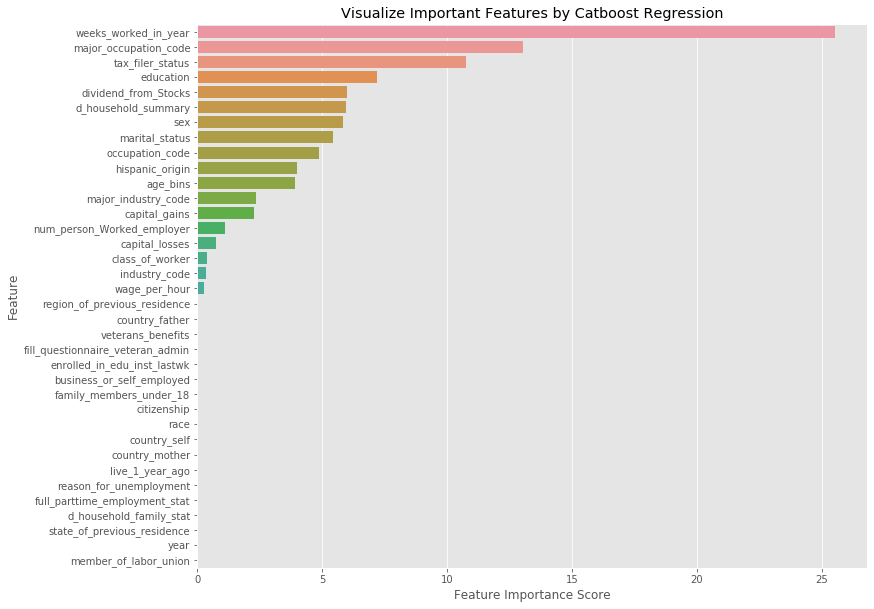

In [11]:
#Fit CatBoost Classifier Model to Training Set
cat.fit(X_train, y_train)

#Feature Contribution
feature_cols = X_train.columns
feature_imp = pd.Series(cat.feature_importances_, index = feature_cols).sort_values(ascending = False)
feature_imp

#Create Bar Plot
plt.figure(figsize=(12,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Visualize Important Features by Catboost Regression')
plt.show()

In [16]:
#See how different when fit with training set
cat.fit(X_train, y_train)

#Predict target variable from training set
y_pred_train = cat.predict(X_train)

#Accuracy of Model from training set
print('ROC_AUC from training set:', metrics.roc_auc_score(y_train, y_pred_train))

0:	learn: 0.6174289	total: 160ms	remaining: 7.86s
1:	learn: 0.5514123	total: 276ms	remaining: 6.62s
2:	learn: 0.5084848	total: 433ms	remaining: 6.78s
3:	learn: 0.4768067	total: 533ms	remaining: 6.13s
4:	learn: 0.4498257	total: 701ms	remaining: 6.31s
5:	learn: 0.4263251	total: 866ms	remaining: 6.35s
6:	learn: 0.4090877	total: 1s	remaining: 6.17s
7:	learn: 0.3930187	total: 1.14s	remaining: 5.96s
8:	learn: 0.3804633	total: 1.27s	remaining: 5.79s
9:	learn: 0.3698333	total: 1.4s	remaining: 5.6s
10:	learn: 0.3614659	total: 1.53s	remaining: 5.44s
11:	learn: 0.3540727	total: 1.68s	remaining: 5.31s
12:	learn: 0.3485985	total: 1.81s	remaining: 5.16s
13:	learn: 0.3435107	total: 1.95s	remaining: 5.01s
14:	learn: 0.3390887	total: 2.08s	remaining: 4.85s
15:	learn: 0.3342678	total: 2.21s	remaining: 4.7s
16:	learn: 0.3311904	total: 2.35s	remaining: 4.55s
17:	learn: 0.3281900	total: 2.49s	remaining: 4.42s
18:	learn: 0.3254972	total: 2.62s	remaining: 4.28s
19:	learn: 0.3236138	total: 2.77s	remaining: 4.

Accuracy Score: 85.17 %
Precision: 27.85 %
Recall: 89.52 %
F1-Score: 42.48 %


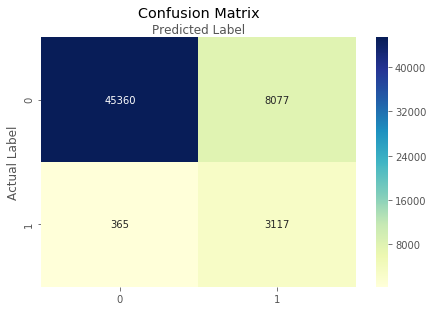

In [17]:
#Predict target variable from test set
y_pred = cat.predict(X_test)

#Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

#Visual Confusion Matrix Using Heatmap
class_names = [0,1]
fig, ax=plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Create Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g' )
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

#Model Accuracy: How often  is the classifier correct?
print("Accuracy Score:", round(metrics.accuracy_score(y_test, y_pred)*100,2),"%")

#Model Precision
print("Precision:", round(metrics.precision_score(y_test, y_pred)*100,2), "%")

#Model Recall
print("Recall:", round(metrics.recall_score(y_test, y_pred)*100,2), "%")

#Model F1-Score
print("F1-Score:", round(metrics.f1_score(y_test, y_pred)*100,2), "%")



In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91     53437
           1       0.28      0.90      0.42      3482

    accuracy                           0.85     56919
   macro avg       0.64      0.87      0.67     56919
weighted avg       0.95      0.85      0.88     56919



from the matrix, focus on macro avg f1-score due to it combines precision and recall together. As you can see the score still low, just 67%. We can improve to get more score by preprocessing our data, change algorithm, hyper-parameter tuning